In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sg
from IPython.display import HTML
from matplotlib import animation, rc

In [2]:
def jakes(N=34,
          pts=1000,
          K=0,
          fs=50,
          alpha=0,
          Omega_p=1,
          modified=False,
          fm=None,
          seed=42):
    if seed:
        np.random.seed(seed=seed)
    M = int((N / 2 - 1) / 2)
    t, T = np.linspace(0, pts / fs, pts, retstep=True)
    if not fm:
        fm = 0.1 / T
    beta = np.arange(0, M) * np.pi / M + 0
    f = fm * np.cos(beta)

    exp_g_I2 = (2 / N) * (M + np.cos(alpha)**2 - np.sum(np.cos(2 * beta)))
    exp_g_Q2 = (2 / N) * (M + np.sin(alpha)**2 - np.sum(np.cos(2 * beta)))
    g_I = []
    g_Q = []
    g = []
    m_I = 0
    m_Q = 0
    if modified:
        s = np.sqrt(K * Omega_p / (K + 1))
    for ti in t:
        if modified:
            theta_0 = np.random.uniform(0, 2 * np.pi)
            phi_0 = np.random.uniform(0, 2 * np.pi)
            m_I = s * np.cos(2 * np.pi * fm * np.cos(theta_0) * ti + phi_0)
            m_Q = s * np.cos(2 * np.pi * fm * np.cos(theta_0) * ti + phi_0)
        g_I.append((Omega_p / (exp_g_I2)) * np.sum(
            np.cos(beta) * np.cos(2 * np.pi * f * ti) +
            (1 / np.sqrt(2)) * np.cos(alpha) * np.cos(2 * np.pi * fm * ti)) *
                   2 * np.sqrt(2) / N + m_I)
        g_Q.append((Omega_p / (exp_g_Q2)) * np.sum(
            np.sin(beta) * np.cos(2 * np.pi * f * ti) +
            (1 / np.sqrt(2)) * np.sin(alpha) * np.cos(2 * np.pi * fm * ti)) *
                   2 * np.sqrt(2) / N + m_Q)
        g.append(np.complex(g_I[-1], g_Q[-1]))

    return t, g

0.00%
0.00%
8.85%
17.70%
26.55%
35.40%
44.25%
53.10%
61.95%
70.80%
79.65%
88.50%
97.35%


0.00%


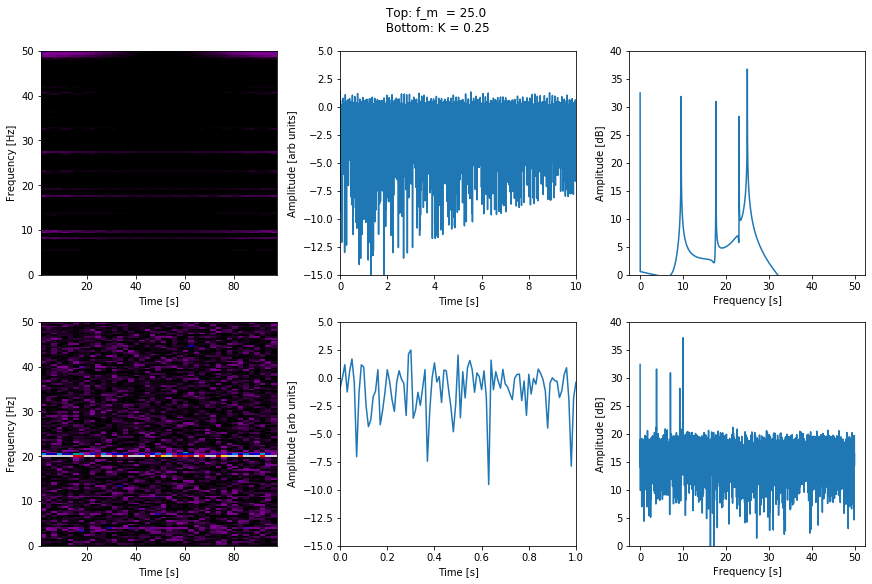

In [3]:
interval = 44  # milliseconds
T = 5000  # milliseconds
frame_N = int(T / interval)
pts_anim = 10000

# changing fm
fig, ax = plt.subplots(2, 3, figsize=(12, 8), constrained_layout=True)
fm_base = 0
Omega_p_anim = 1
fs = 10
fs_anim = 100
K_anim = 0
alpha_anim = 0
t, gfm = jakes(pts=pts_anim,
               fs=fs_anim,
               modified=True,
               K=K_anim,
               alpha=alpha_anim,
               fm=fm_base,
               Omega_p=Omega_p_anim)

spec_f, spec_t, spec = sg.spectrogram(np.abs(np.asarray(gfm)), fs_anim)
ax_fm_spec = ax[0][0]
quad_fm = ax_fm_spec.pcolormesh(spec_t, spec_f, spec, cmap='nipy_spectral')
ax_fm_spec.set_xlabel('Time [s]')
ax_fm_spec.set_ylabel('Frequency [Hz]')

ax_fm_g = ax[0][1]
line_fm, = ax_fm_g.plot(t, 10 * np.log10(np.abs(gfm)))
ax_fm_g.set_xlim((0, 10))
ax_fm_g.set_ylim((-15, 5))
ax_fm_g.set_xlabel('Time [s]')
ax_fm_g.set_ylabel('Amplitude [arb units]')

ax_fm_PSD = ax[0][2]
line2_fm, = ax_fm_PSD.plot(
    np.fft.fftfreq(len(gfm), 1 / fs_anim)[:int(pts_anim / 2)],
    10 * np.log10(np.abs(np.fft.fft(gfm)))[:int(pts_anim / 2)])
ax_fm_PSD.set_ylim((0, 40))
ax_fm_PSD.set_xlabel('Frequency [s]')
ax_fm_PSD.set_ylabel('Amplitude [dB]')

# changing K
t, gK = jakes(pts=pts_anim,
              fs=fs_anim,
              modified=True,
              K=K_anim,
              alpha=2.0,
              fm=fm_base,
              Omega_p=Omega_p_anim)

spec_f, spec_t, spec = sg.spectrogram(np.abs(np.asarray(gK)), fs_anim)
ax_K_spec = ax[1][0]
quad_K = ax_K_spec.pcolormesh(spec_t, spec_f, spec, cmap='nipy_spectral')
ax_K_spec.set_xlabel('Time [s]')
ax_K_spec.set_ylabel('Frequency [Hz]')

ax_K_g = ax[1][1]
line_K, = ax_K_g.plot(t, 10 * np.log10(np.abs(gK)))
ax_K_g.set_xlim((0, 1))
ax_K_g.set_ylim((-15, 5))
ax_K_g.set_xlabel('Time [s]')
ax_K_g.set_ylabel('Amplitude [arb units]')

ax_K_PSD = ax[1][2]
line2_K, = ax_K_PSD.plot(
    np.fft.fftfreq(len(gK), 1 / fs_anim)[:int(pts_anim / 2)],
    10 * np.log10(np.abs(np.fft.fft(gK)))[:int(pts_anim / 2)])
ax_K_PSD.set_ylim((0, 40))
ax_K_PSD.set_xlabel('Frequency [s]')
ax_K_PSD.set_ylabel('Amplitude [dB]')

fig.suptitle(f'Top: f_m  = {0:04.1f}\n Bottom: K = {0:0.2f}')


def animate(i):
    if i % 10 == 0:
        print(f'{100*i/frame_N:.2f}%')
    #changing fm
    fm = fm_base + (np.sin(2 * np.pi * i / frame_N) + 1) / 2 * (fs_anim / 2)
    K = K_anim

    t, gfm = jakes(pts=pts_anim,
                   fs=fs_anim,
                   modified=True,
                   K=K,
                   alpha=alpha_anim,
                   fm=fm,
                   Omega_p=Omega_p_anim,
                   seed=None)
    spec_f, spec_t, spec = sg.spectrogram(np.abs(np.asarray(gfm)), fs_anim)
    spec = spec[:-1, :-1]
    spec = spec.ravel()
    quad_fm.set_array(spec)
    line_fm.set_data(t, 10 * np.log10(np.abs(gfm)))
    line2_fm.set_data(
        np.fft.fftfreq(len(gfm), 1 / fs_anim)[:int(pts_anim / 2)],
        10 * np.log10(np.abs(np.fft.fft(gfm)))[:int(pts_anim / 2)])

    fig.suptitle(f'f_m = {fm:.2f}')
    fm_fm = fm

    #changing K
    fm = fm_base + (fs_anim / 10)
    K = K_anim + (np.sin(2 * np.pi * i / frame_N) + 1) / 2 * 0.5
    t, gK = jakes(pts=pts_anim,
                  fs=fs_anim,
                  modified=True,
                  K=K,
                  alpha=alpha_anim,
                  fm=fm,
                  Omega_p=Omega_p_anim,
                  seed=None)
    spec_f, spec_t, spec = sg.spectrogram(np.abs(np.asarray(gK)), fs_anim)
    spec = spec[:-1, :-1]
    spec = spec.ravel()
    quad_K.set_array(spec)

    line_K.set_data(t, 10 * np.log10(np.abs(gK)))

    fig.suptitle(f'Top: f_m  = {fm_fm:04.1f}\n Bottom: K = {K:0.2f}')

    line2_K.set_data(
        np.fft.fftfreq(len(gK), 1 / fs_anim)[:int(pts_anim / 2)],
        10 * np.log10(np.abs(np.fft.fft(gK)))[:int(pts_anim / 2)])

    return quad_fm, line_fm, line2_fm


anim = animation.FuncAnimation(
    fig,
    animate,  #init_func=init,
    frames=frame_N,
    interval=interval)  #,
#blit=True)
h = anim.to_html5_video()
HTML(h)
# with open('jakes_animation_001.html', 'w') as html_file:
#     html_file.write(h)